# Linear Regression including further feature engineering

Each feature has been engineered to reflect the different populations in each area. Each feature is now given ***per capita*** to increase data quality. This allowed for comparison using more realistic numbers for each area. The feature **Green** which describes the *number of green spaces* in a designated area has been used to calculate two new features: **GreensPerKMSQ** and **GreensPerPerson**.

- GreensPerKMSQ refers to the number of green spaces per square kilometer in each area.
- GreensPerPerson refers to the number of green spaces per person in each area.

The areas of Galway and Roscommon have been dropped to allow us to better reflect the Dublin area.


In [51]:
# Import necessary packages
# Packages needed are: Pandas, Seaborn, Scipy, Statsmodels.formula.api and Matplotlip.pyplot

# Sys needed to point to some packages
# import sys
# sys.path.append('C:/Users/Eóin/Anaconda3/envs/comp47350/lib/site-packages')
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

# Show the correlation value in the plot.
%matplotlib inline

# Read new CSV containing data adjusted to be per capita
df = pd.read_csv('FinalPerCapita.csv')
# Drop unecessary columns
df= df.drop('Unnamed: 0', 1)
# View data frame
df.head()

,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,TotalCrime,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,...,GeneralHealthVeryBad,GeneralHealthNotStated,Total_Under18Male,Total_Under18Female,Total_Under18,Green,Area,PopulationDensity,GreensPerKMSQ,GreensPerPerson
0,Balbriggan,0.008028,0.006988,0.007445,0.019549,0.042010,0.488562,0.511438,24042,0.382289,...,0.002745,0.021338,0.171949,0.161883,0.333832,9,60.000023,400.699846,0.150000,0.000374
1,Ballyfermot,0.009863,0.006273,0.012655,0.029733,0.058523,0.480329,0.519671,27579,0.349070,...,0.004823,0.020559,0.124225,0.119149,0.243374,4,8.568579,3218.620030,0.466822,0.000145
2,Ballymun,0.008720,0.010012,0.011995,0.034694,0.065421,0.480185,0.519815,21675,0.316955,...,0.003460,0.034556,0.138085,0.133472,0.271557,4,7.025158,3085.339783,0.569382,0.000185
3,BlackrockCoDublin,0.007599,0.003315,0.004878,0.011070,0.026862,0.469166,0.530834,31978,0.432391,...,0.002033,0.015980,0.111420,0.108481,0.219901,3,8.965902,3566.624005,0.334601,0.000094
4,Blanchardstown,0.008055,0.005536,0.005903,0.021248,0.040743,0.491364,0.508636,98078,0.432064,...,0.001988,0.027509,0.155539,0.147862,0.303401,15,45.287530,2165.673399,0.331217,0.000153
5,BridewellDublin,0.012134,0.007567,0.013003,0.200531,0.233235,0.516787,0.483213,22994,0.469688,...,0.003958,0.037488,0.071149,0.067235,0.138384,0,3.005021,7651.860597,0.000000,0.000000
6,Cabinteely,0.007022,0.002534,0.002259,0.009464,0.021280,0.482384,0.517616,32754,0.403829,...,0.002259,0.020913,0.126916,0.121603,0.248519,35,18.411407,1779.005778,1.900995,0.001069
7,Cabra,0.007871,0.005949,0.007185,0.027367,0.048373,0.473296,0.526704,21851,0.428493,...,0.003204,0.035467,0.108279,0.106677,0.214956,3,11.359962,1923.509972,0.264085,0.000137
8,Clontarf,0.011143,0.002658,0.003034,0.012593,0.029428,0.476573,0.523427,37243,0.449615,...,0.002255,0.019467,0.106033,0.099294,0.205327,21,18.083254,2059.529726,1.161295,0.000564
9,Coolock,0.007718,0.005343,0.011645,0.018214,0.042920,0.483481,0.516519,52213,0.385555,...,0.003237,0.025722,0.133032,0.127210,0.260242,2,17.676889,2953.743672,0.113142,0.000038


In [52]:
# View feature headings
print(list(df))

['Garda Station', 'Theft', 'Assault & Kidnapping', 'Fraud & Drugs & Weapons', 'Environment & Public Order', 'TotalCrime', 'PopulationTotalMale', 'PopulationTotalFemale', 'PopulationTotal', 'PrincipalStatusAtWork', 'PrincipalStatusLookingForFirstJob', 'PrincipalStatusUnemployed', 'PrincipalStatusStudent', 'PrincipalStatusLookingAfterHome/Family', 'PrincipalStatusRetired', 'PrincipalStatusUnableToWork', 'PrincipalStatusOther', 'SocialClassProfessionalWorkers', 'SocialClassManagerialAndTechnical', 'SocialClassNonManual', 'SocialClassSkilledManual', 'SocialClassSemiSkilled', 'SocialClassUnskilled', 'SocialClassOther', 'AgeEducationCeasedUnder15', 'AgeEducationCeasedAge15', 'AgeEducationCeasedAge16', 'AgeEducationCeasedAge17', 'AgeEducationCeasedAge18', 'AgeEducationCeasedAge19', 'AgeEducationCeasedAge20', 'AgeEducationCeasedAge21+', 'AgeEducationCeasedNotStated', 'EducationNotCeasedStillAtSchool', 'EducationNotCeasedOther', 'HighestLevelEducationNoFormalEducation', 'HighestLevelEducationPr

In [53]:
# Create column containing the sum of all crime occurrences in each Dublin area
dflist = list(df)
df['TotalCrimePerCap'] = df[dflist[1:4]].sum(axis=1)

In [54]:
# Verify new column
df.head()

,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,TotalCrime,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,...,GeneralHealthNotStated,Total_Under18Male,Total_Under18Female,Total_Under18,Green,Area,PopulationDensity,GreensPerKMSQ,GreensPerPerson,TotalCrimePerCap
0,Balbriggan,0.008028,0.006988,0.007445,0.019549,0.042010,0.488562,0.511438,24042,0.382289,...,0.021338,0.171949,0.161883,0.333832,9,60.000023,400.699846,0.150000,0.000374,0.022461
1,Ballyfermot,0.009863,0.006273,0.012655,0.029733,0.058523,0.480329,0.519671,27579,0.349070,...,0.020559,0.124225,0.119149,0.243374,4,8.568579,3218.620030,0.466822,0.000145,0.028790
2,Ballymun,0.008720,0.010012,0.011995,0.034694,0.065421,0.480185,0.519815,21675,0.316955,...,0.034556,0.138085,0.133472,0.271557,4,7.025158,3085.339783,0.569382,0.000185,0.030727
3,BlackrockCoDublin,0.007599,0.003315,0.004878,0.011070,0.026862,0.469166,0.530834,31978,0.432391,...,0.015980,0.111420,0.108481,0.219901,3,8.965902,3566.624005,0.334601,0.000094,0.015792
4,Blanchardstown,0.008055,0.005536,0.005903,0.021248,0.040743,0.491364,0.508636,98078,0.432064,...,0.027509,0.155539,0.147862,0.303401,15,45.287530,2165.673399,0.331217,0.000153,0.019495


In [55]:
# Save this as the final CSV to be used in creating the new model
df.to_csv('FinalDublin.csv')
df.head(33)

,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,TotalCrime,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,...,GeneralHealthNotStated,Total_Under18Male,Total_Under18Female,Total_Under18,Green,Area,PopulationDensity,GreensPerKMSQ,GreensPerPerson,TotalCrimePerCap
0,Balbriggan,0.008028,0.006988,0.007445,0.019549,0.042010,0.488562,0.511438,24042,0.382289,...,0.021338,0.171949,0.161883,0.333832,9,60.000023,400.699846,0.150000,0.000374,0.022461
1,Ballyfermot,0.009863,0.006273,0.012655,0.029733,0.058523,0.480329,0.519671,27579,0.349070,...,0.020559,0.124225,0.119149,0.243374,4,8.568579,3218.620030,0.466822,0.000145,0.028790
2,Ballymun,0.008720,0.010012,0.011995,0.034694,0.065421,0.480185,0.519815,21675,0.316955,...,0.034556,0.138085,0.133472,0.271557,4,7.025158,3085.339783,0.569382,0.000185,0.030727
3,BlackrockCoDublin,0.007599,0.003315,0.004878,0.011070,0.026862,0.469166,0.530834,31978,0.432391,...,0.015980,0.111420,0.108481,0.219901,3,8.965902,3566.624005,0.334601,0.000094,0.015792
4,Blanchardstown,0.008055,0.005536,0.005903,0.021248,0.040743,0.491364,0.508636,98078,0.432064,...,0.027509,0.155539,0.147862,0.303401,15,45.287530,2165.673399,0.331217,0.000153,0.019495
5,BridewellDublin,0.012134,0.007567,0.013003,0.200531,0.233235,0.516787,0.483213,22994,0.469688,...,0.037488,0.071149,0.067235,0.138384,0,3.005021,7651.860597,0.000000,0.000000,0.032704
6,Cabinteely,0.007022,0.002534,0.002259,0.009464,0.021280,0.482384,0.517616,32754,0.403829,...,0.020913,0.126916,0.121603,0.248519,35,18.411407,1779.005778,1.900995,0.001069,0.011815
7,Cabra,0.007871,0.005949,0.007185,0.027367,0.048373,0.473296,0.526704,21851,0.428493,...,0.035467,0.108279,0.106677,0.214956,3,11.359962,1923.509972,0.264085,0.000137,0.021006
8,Clontarf,0.011143,0.002658,0.003034,0.012593,0.029428,0.476573,0.523427,37243,0.449615,...,0.019467,0.106033,0.099294,0.205327,21,18.083254,2059.529726,1.161295,0.000564,0.016835
9,Coolock,0.007718,0.005343,0.011645,0.018214,0.042920,0.483481,0.516519,52213,0.385555,...,0.025722,0.133032,0.127210,0.260242,2,17.676889,2953.743672,0.113142,0.000038,0.024706


In [8]:
# Read in final CSV
df = pd.read_csv('FinalDublin.csv')
df.dtypes

Unnamed: 0                                       int64
Garda Station                                   object
Theft                                          float64
Assault & Kidnapping                           float64
Fraud & Drugs & Weapons                        float64
Environment & Public Order                     float64
TotalCrime                                     float64
PopulationTotalMale                            float64
PopulationTotalFemale                          float64
PopulationTotal                                  int64
PrincipalStatusAtWork                          float64
PrincipalStatusLookingForFirstJob              float64
PrincipalStatusUnemployed                      float64
PrincipalStatusStudent                         float64
PrincipalStatusLookingAfterHome/Family         float64
PrincipalStatusRetired                         float64
PrincipalStatusUnableToWork                    float64
PrincipalStatusOther                           float64
SocialClas

In [9]:
# Verify correctness of this dataframe
df.head()

,Unnamed: 0,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,TotalCrime,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,...,GeneralHealthNotStated,Total_Under18Male,Total_Under18Female,Total_Under18,Green,Area,PopulationDensity,GreensPerKMSQ,GreensPerPerson,TotalCrimePerCap
0,0,Balbriggan,0.008028,0.006988,0.007445,0.019549,0.042010,0.488562,0.511438,24042,...,0.021338,0.171949,0.161883,0.333832,9,60.000023,400.699846,0.150000,0.000374,0.022461
1,1,Ballyfermot,0.009863,0.006273,0.012655,0.029733,0.058523,0.480329,0.519671,27579,...,0.020559,0.124225,0.119149,0.243374,4,8.568579,3218.620030,0.466822,0.000145,0.028790
2,2,Ballymun,0.008720,0.010012,0.011995,0.034694,0.065421,0.480185,0.519815,21675,...,0.034556,0.138085,0.133472,0.271557,4,7.025158,3085.339783,0.569382,0.000185,0.030727
3,3,BlackrockCoDublin,0.007599,0.003315,0.004878,0.011070,0.026862,0.469166,0.530834,31978,...,0.015980,0.111420,0.108481,0.219901,3,8.965902,3566.624005,0.334601,0.000094,0.015792
4,4,Blanchardstown,0.008055,0.005536,0.005903,0.021248,0.040743,0.491364,0.508636,98078,...,0.027509,0.155539,0.147862,0.303401,15,45.287530,2165.673399,0.331217,0.000153,0.019495


In [10]:
# Drop superfluous columns
df = df.drop(df.columns[[0]], axis=1)
df.head()

,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,TotalCrime,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,...,GeneralHealthNotStated,Total_Under18Male,Total_Under18Female,Total_Under18,Green,Area,PopulationDensity,GreensPerKMSQ,GreensPerPerson,TotalCrimePerCap
0,Balbriggan,0.008028,0.006988,0.007445,0.019549,0.042010,0.488562,0.511438,24042,0.382289,...,0.021338,0.171949,0.161883,0.333832,9,60.000023,400.699846,0.150000,0.000374,0.022461
1,Ballyfermot,0.009863,0.006273,0.012655,0.029733,0.058523,0.480329,0.519671,27579,0.349070,...,0.020559,0.124225,0.119149,0.243374,4,8.568579,3218.620030,0.466822,0.000145,0.028790
2,Ballymun,0.008720,0.010012,0.011995,0.034694,0.065421,0.480185,0.519815,21675,0.316955,...,0.034556,0.138085,0.133472,0.271557,4,7.025158,3085.339783,0.569382,0.000185,0.030727
3,BlackrockCoDublin,0.007599,0.003315,0.004878,0.011070,0.026862,0.469166,0.530834,31978,0.432391,...,0.015980,0.111420,0.108481,0.219901,3,8.965902,3566.624005,0.334601,0.000094,0.015792
4,Blanchardstown,0.008055,0.005536,0.005903,0.021248,0.040743,0.491364,0.508636,98078,0.432064,...,0.027509,0.155539,0.147862,0.303401,15,45.287530,2165.673399,0.331217,0.000153,0.019495


In [115]:
# View correlations and assign to new data frame
corr = df.corr()
corr.to_csv('CorrelationsPerCapita.csv')
corr

,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,TotalCrime,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,PrincipalStatusLookingForFirstJob,...,GeneralHealthNotStated,Total_Under18Male,Total_Under18Female,Total_Under18,Green,Area,PopulationDensity,GreensPerKMSQ,GreensPerPerson,TotalCrimePerCap
Theft,1.000000,0.915686,0.796250,0.715887,0.819947,0.556366,-0.556366,-0.214278,0.506787,0.483700,...,0.945154,-0.713197,-0.710965,-0.713481,-0.258080,-0.410777,0.587733,0.200358,-0.275558,0.947817
Assault & Kidnapping,0.915686,1.000000,0.898468,0.741903,0.849294,0.566278,-0.566278,-0.210404,0.398439,0.476269,...,0.896940,-0.519600,-0.509134,-0.515533,-0.322818,-0.257630,0.402279,-0.007738,-0.322578,0.980749
Fraud & Drugs & Weapons,0.796250,0.898468,1.000000,0.766122,0.854944,0.537870,-0.537870,-0.143799,0.310183,0.533449,...,0.775570,-0.481838,-0.468294,-0.476210,-0.383705,-0.249026,0.355345,-0.146140,-0.431855,0.938566
Environment & Public Order,0.715887,0.741903,0.766122,1.000000,0.982207,0.632980,-0.632980,-0.204241,0.451658,0.476027,...,0.676728,-0.584527,-0.583783,-0.585285,-0.321992,-0.307549,0.488642,-0.098899,-0.347155,0.775589
TotalCrime,0.819947,0.849294,0.854944,0.982207,1.000000,0.648010,-0.648010,-0.212536,0.466130,0.512775,...,0.780561,-0.618197,-0.614954,-0.617811,-0.341776,-0.327093,0.507770,-0.068452,-0.367543,0.880336
PopulationTotalMale,0.556366,0.566278,0.537870,0.632980,0.648010,1.000000,-1.000000,-0.113469,0.365651,0.678364,...,0.656474,-0.337598,-0.348617,-0.343572,-0.355298,-0.031042,0.557240,-0.295136,-0.388285,0.579307
PopulationTotalFemale,-0.556366,-0.566278,-0.537870,-0.632980,-0.648010,-1.000000,1.000000,0.113469,-0.365651,-0.678364,...,-0.656474,0.337598,0.348617,0.343572,0.355298,0.031042,-0.557240,0.295136,0.388285,-0.579307
PopulationTotal,-0.214278,-0.210404,-0.143799,-0.204241,-0.212536,-0.113469,0.113469,1.000000,-0.039855,-0.116297,...,-0.206554,0.332798,0.310724,0.322761,0.375873,0.379591,-0.164486,-0.002162,0.008245,-0.198505
PrincipalStatusAtWork,0.506787,0.398439,0.310183,0.451658,0.466130,0.365651,-0.365651,-0.039855,1.000000,0.011221,...,0.525985,-0.605941,-0.597945,-0.603233,-0.063619,-0.062538,0.218197,-0.030110,-0.113917,0.425957
PrincipalStatusLookingForFirstJob,0.483700,0.476269,0.533449,0.476027,0.512775,0.678364,-0.678364,-0.116297,0.011221,1.000000,...,0.552756,-0.319204,-0.299103,-0.310094,-0.438621,-0.214877,0.691595,-0.265901,-0.497537,0.521187


In [12]:
# View the most heavily weighted (positive and negative) correlations for each key
for key in corr.keys():
    print('Most positive correlation with ' + key + ' is: ' + corr[corr[key]==corr[corr<1][key].max()].index[0])
    print('Most negative correlation with ' + key + ' is: ' + corr[corr[key]==corr[corr<0][key].min()].index[0])

Most positive correlation with Theft is: TotalCrimePerCap
Most negative correlation with Theft is: HighestLevelEducationUpperSecondary
Most positive correlation with Assault & Kidnapping is: TotalCrimePerCap
Most negative correlation with Assault & Kidnapping is: AgeEducationCeasedAge18
Most positive correlation with Fraud & Drugs & Weapons is: TotalCrimePerCap
Most negative correlation with Fraud & Drugs & Weapons is: GeneralHealthVeryGood
Most positive correlation with Environment & Public Order is: TotalCrime
Most negative correlation with Environment & Public Order is: PopulationTotalFemale
Most positive correlation with TotalCrime is: Environment & Public Order
Most negative correlation with TotalCrime is: PopulationTotalFemale
Most positive correlation with PopulationTotalMale is: EducationNotCeasedOther
Most negative correlation with PopulationTotalMale is: PopulationTotalFemale
Most positive correlation with PopulationTotalFemale is: PrincipalStatusRetired
Most negative correla

In [ ]:
# Print any correlation higher than 0.3 or lower than -0.3
# This cell takes a good deal of time to run so is commented out

# for key in corr.keys():
#     print(key, corr[corr[key]==corr[corr<-0.3][key]])
#     print(key, corr[corr[key]==corr[corr>0.3][key]])

Theft                                                 Theft  Assault & Kidnapping  \
PopulationTotalFemale                       -0.556366             -0.566278   
PrincipalStatusLookingAfterHome/Family      -0.666934             -0.559240   
SocialClassManagerialAndTechnical           -0.406065             -0.472688   
SocialClassNonManual                        -0.664423             -0.492379   
SocialClassSkilledManual                    -0.313149             -0.144579   
AgeEducationCeasedAge16                     -0.338284             -0.223199   
AgeEducationCeasedAge17                     -0.618085             -0.465606   
AgeEducationCeasedAge18                     -0.747560             -0.659953   
AgeEducationCeasedAge19                     -0.580218             -0.422997   
AgeEducationCeasedAge20                     -0.370638             -0.387333   
HighestLevelEducationUpperSecondary         -0.753793             -0.645765   
HighestLevelEducationTechnicalQualification -0

## 'NotStated' and 'Other'

The highest correlations showing between the target feature of TotalCrimePerCap tend to be those including 'NotStated' or 'Other' which is essentially missing data. Therefore features including 'NotStated' and 'Other' (i.e. SocialClassOther) will not be used in modelling.

## Data Understanding

- We chose a selection of features showing higher correlation with our target feature of TotalCrimePerCap. These correlations were shown using scatterplots. The packages matplotlib.pyplot and seaborn were used in this analysis. Seaborn was used as it is possible to deweight outliers, thereby producing a more accurate line.
<br><br>
- The feature SocialClassOther shows a high positive correlation with the target feature. This could be due to the high number of people selecting this option in the census to avoid giving accurate information regarding their socio-economic status. However this is an unreliable feature and will **not** be used.
<br><br>
- The feature PrincipalStatusStudent shows a comparitively strong correlation with thee target feature. This could perhaps be due to the fact that students will be more prone to living in areas with lower rent, which may likely be populated by people of lower socio-economic standing.
<br><br>
- While the features of GreensPerPerson and PopulationDensity do not show as being very significant with correlation values of -0.359 and 0.473 these are plotted to show that there is a relationship between these features and the target feature. 
<br><br>
- There is a negative correlation between GreensPerPerson and the target feature, indicating at this stage that there is a negative relationship between the presence of green space and levels of crime per capita, i.e. that areas with less green space are more prone to the occurence of crime.
<br><br>
- There is a positive correlation between PopulationDensity and the target feature, indicating at this stage that there is a relationship between population density in an area and the levels of crime in that area, i.e. that denser areas are more prone to crime occurence.

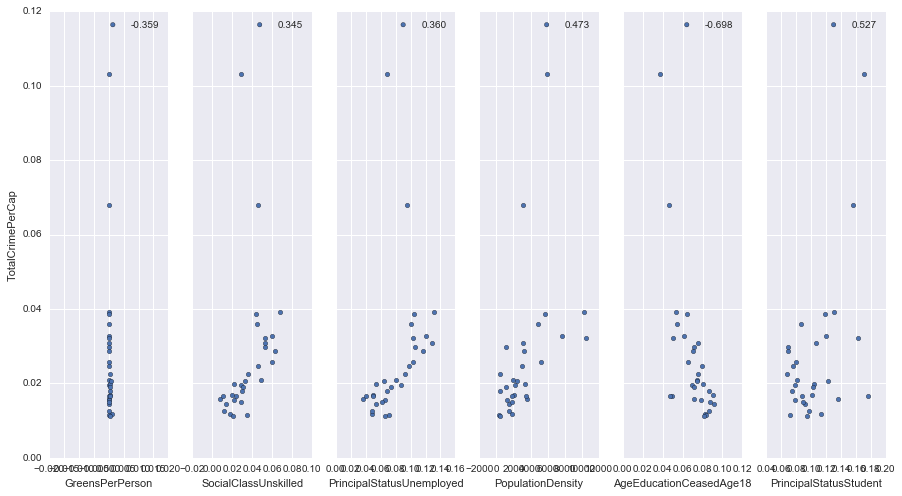

In [14]:
# Scatterplots for selection of descriptive features and target feature
# Features chosen comprise our original features of interest i.e. Green Space and Population Density and features which more heavily correlate to TotalCrimePerCap

fig, axs = plt.subplots(1, 6, sharey=True)
df.plot(kind='scatter', x='GreensPerPerson', y='TotalCrimePerCap', label="%.3f" % df[['GreensPerPerson', 'TotalCrimePerCap']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
df.plot(kind='scatter', x='SocialClassUnskilled', y='TotalCrimePerCap', label="%.3f" % df[['SocialClassUnskilled', 'TotalCrimePerCap']].corr().as_matrix()[0,1], ax=axs[1])
df.plot(kind='scatter', x='PrincipalStatusUnemployed', y='TotalCrimePerCap', label="%.3f" % df[['PrincipalStatusUnemployed', 'TotalCrimePerCap']].corr().as_matrix()[0,1], ax=axs[2])
df.plot(kind='scatter', x='PopulationDensity', y='TotalCrimePerCap', label="%.3f" % df[['PopulationDensity', 'TotalCrimePerCap']].corr().as_matrix()[0,1], ax=axs[3])
df.plot(kind='scatter', x='AgeEducationCeasedAge18', y='TotalCrimePerCap', label="%.3f" % df[['AgeEducationCeasedAge18', 'TotalCrimePerCap']].corr().as_matrix()[0,1], ax=axs[4])
df.plot(kind='scatter', x='PrincipalStatusStudent', y='TotalCrimePerCap', label="%.3f" % df[['PrincipalStatusStudent', 'TotalCrimePerCap']].corr().as_matrix()[0,1], ax=axs[5])

plt.savefig('scatterplots-linearmodelnotebook-totalcrimepercap.png')

## Pairwise Feature Interaction

- Here, some pairwise feature interaction is plotted using the target feature and features of interest such as GreensPerPerson and PopulationDensity. These are features of interest as the area in question of 'Kevin Street' corresponding to the Liberties area of Dublin 8 is notably low in green space and high in population density.
<br><br>
- Seaborn is used here to as it allows for de-weighted outliers. Additionally the Pearson r squared value is shown using the jointplots giving an indication of the significance of the feature. 
<br><br>
- Additionally, Seaborn allows for visual representation of linear regression but not for values, so it is used only as a preliminary analysis.

In [16]:
def r2(x, y):
    return stats.pearsonr(x,y)[0]**2

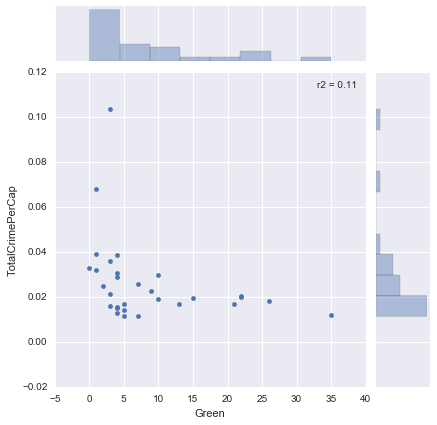

In [113]:
# A jointplot shows the scatterplot with a histogram on each side showing scatterplot density
# The r squared value is also shown
sns.jointplot(x=df['Green'], y=df['TotalCrimePerCap'], stat_func=r2)
plt.savefig('GreenJointPlot.png')

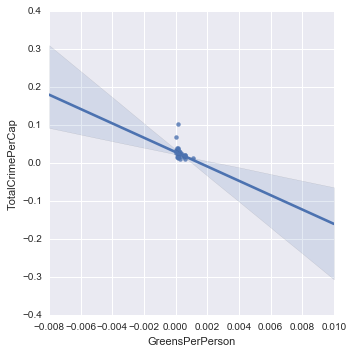

In [112]:
# Show the relationship between number of green spaces per person and the occurence of crime per person
# The scale for this plot seems to be in error, but the regression line indicates that higher levels of green space will result in lower crime levels per capita
sns.lmplot(x='GreensPerPerson', y='TotalCrimePerCap', data=df, robust=True)
plt.savefig('GreenRegLine.png')

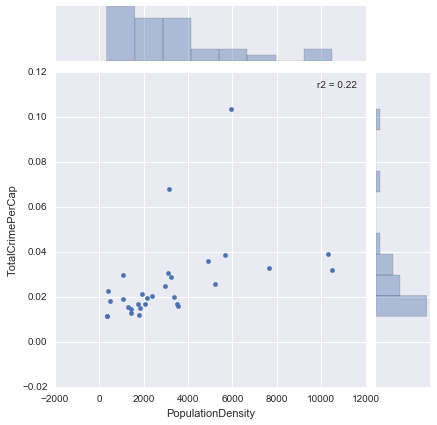

In [111]:
sns.jointplot(x=df['PopulationDensity'], y=df['TotalCrimePerCap'], stat_func=r2)
plt.savefig('PopDensJointPlot.png')

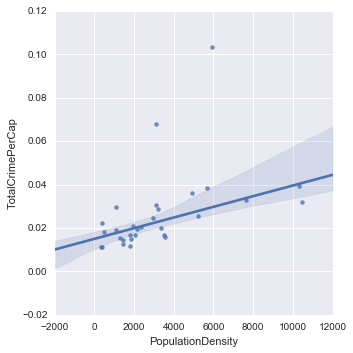

In [110]:
# This linear regression plot indicates that higher levels of population density will likewise result in higher levels of crime occurrence per capita
sns.lmplot(x='PopulationDensity', y='TotalCrimePerCap', data=df, robust=True)
plt.savefig('PopDensRegLine.png')

## Preliminary Model

- Using the feature AgeEducationCeasedAge18 which had a comparitively strong negative correlation with crime rate, a linear regression model is attempted.
<br><br>
- The R-squared value of this model is 0.488 indicating a very non-robust model.
<br><br>
- A model using multiple linear regression is then made to attempt to raise the R-squared value. Overfitting is very likely in this case.
<br><br>
- It is quite possible that due to this small data set that an effective and robust model will not be achieved.

In [41]:
lm = sm.ols(formula="TotalCrimePerCap ~ AgeEducationCeasedAge18", data=df).fit()

# Print the weights learned for this target feature
print(lm.params)

Intercept                  0.089063
AgeEducationCeasedAge18   -0.892911
dtype: float64


The model learned is: 
<br><br>
   + $TotalCrimePerCap = 0.089063 -0.892911 * AgeEducationCeasedAge18$

In [42]:
# The p-value for the Intercept here is found to be statistically signficant (p-value=0.000)
# The p-value for the feature AgeEducationCeasedAge18 is found to be statistically significant (p-value=0.000)
# The r-squared value of this model is 0.488 indicating that only 48% of the variability in the response has been explained by the regression
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TotalCrimePerCap   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     26.67
Date:                Fri, 06 May 2016   Prob (F-statistic):           1.77e-05
Time:                        23:54:54   Log-Likelihood:                 87.461
No. Observations:                  30   AIC:                            -170.9
Df Residuals:                      28   BIC:                            -168.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                 

## Multiple Linear Regression

- Multiple linear regression is now performed with a number of features to attempt to achieve a higher R-Squared value, i.e. a more thorough explanation of the variability in the response.
<br><br>
- Overfitting is likely and the reliability of the model is not likely to be much higher.
<br><br>

In [67]:
# Attempt a new model using a number of features of interest
# Features chosen included GreensPerPerson and PopulationDensity as these features were of interest in our original project brief
# Other features chosen had a correlation >0.3 or <-0.3 with the target feature

lm = sm.ols(formula="TotalCrimePerCap ~ GreensPerPerson + PrincipalStatusUnemployed + PopulationDensity + AgeEducationCeasedAge18 + HighestLevelEducationLowerSecondary + GeneralHealthBad + SocialClassUnskilled + PrincipalStatusLookingForFirstJob + PrincipalStatusStudent", data=df).fit()

# Print the weights learned for this target feature
print(lm.params)

Intercept                              4.490426e-02
GreensPerPerson                       -3.904661e+00
PrincipalStatusUnemployed             -4.286455e-02
PopulationDensity                     -6.163956e-07
AgeEducationCeasedAge18               -8.814187e-01
HighestLevelEducationLowerSecondary    3.841581e-01
GeneralHealthBad                      -1.347058e+00
SocialClassUnskilled                  -1.214596e-01
PrincipalStatusLookingForFirstJob      1.635022e+00
PrincipalStatusStudent                 2.381806e-01
dtype: float64


In [68]:
# The only features showing a p-value of less than 0.05 in this model is AgeEducationCeased18 (p-value=0.016)
# The r-squared value of this model is 0.65 indicating that 65% of the variability in the response has been explained by the regression
# Due to the large number of predictors in this model the Adjusted R-squared value for this model is 0.493 
# The fact that this looks like a better model but has a low Adjusted R-squared value could be to over-fitting the data
# Predictions will now also be made on training data

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TotalCrimePerCap   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     4.133
Date:                Sat, 07 May 2016   Prob (F-statistic):            0.00395
Time:                        19:37:59   Log-Likelihood:                 93.185
No. Observations:                  30   AIC:                            -166.4
Df Residuals:                      20   BIC:                            -152.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
In

In [70]:
# View a description of the dataframe for creation of example data frame
describe = df.describe().T
describe.to_csv('DescribeFinalDataFrame.csv')
describe

,count,mean,std,min,25%,50%,75%,max
Theft,30.0,0.010836,0.006803,0.004206,0.007166,0.009099,0.011886,0.039357
Assault & Kidnapping,30.0,0.007125,0.006222,0.002534,0.003766,0.005149,0.007995,0.034014
Fraud & Drugs & Weapons,30.0,0.008288,0.006482,0.002259,0.004246,0.007140,0.010389,0.029888
Environment & Public Order,30.0,0.036020,0.047067,0.009190,0.013789,0.019050,0.034096,0.200531
TotalCrime,30.0,0.062269,0.062634,0.020624,0.029625,0.041376,0.063696,0.292372
PopulationTotalMale,30.0,0.487059,0.014353,0.468335,0.476029,0.482932,0.491444,0.518784
PopulationTotalFemale,30.0,0.512941,0.014353,0.481216,0.508556,0.517068,0.523971,0.531665
PopulationTotal,30.0,30400.666667,15674.991495,11411.000000,22061.750000,25109.500000,34265.250000,98078.000000
PrincipalStatusAtWork,30.0,0.428425,0.052456,0.316955,0.390035,0.427667,0.455642,0.559001
PrincipalStatusLookingForFirstJob,30.0,0.008806,0.004026,0.004495,0.006034,0.007836,0.010974,0.022248


## Attempt to predict TotalCrimePerCap using the features used in the model:
#### Features used were:
- GreensPerPerson
- PrincipalStatusUnemployed
- PopulationDensity
- AgeEducationCeasedAge18
- HighestLevelEducationLowerSecondary
- GeneralHealthBad
- SocialClassUnskilled
- PrincipalStatusLookingForFirstJob
- PrincipalStatusStudent

In [50]:
# Create new data frame with test examples using the mean values from the main dataframe
X_new = pd.DataFrame({'GreensPerPerson': [0.000276], 'PrincipalStatusUnemployed': [0.07962], 'PopulationDensity': [3158.0099], 'AgeEducationCeasedAge18': [0.07034], 'HighestLevelEducationLowerSecondary': [0.08396],  'GeneralHealthBad': [0.013781], 'SocialClassUnskilled': [0.035317], 'PrincipalStatusLookingForFirstJob': [0.008806], 'PrincipalStatusStudent': [0.1037797]})
X_new.head()

,AgeEducationCeasedAge18,GeneralHealthBad,GreensPerPerson,HighestLevelEducationLowerSecondary,PopulationDensity,PrincipalStatusLookingForFirstJob,PrincipalStatusStudent,PrincipalStatusUnemployed,SocialClassUnskilled
0,0.07034,0.013781,0.000276,0.08396,3158.0099,0.008806,0.10378,0.07962,0.035317


In [49]:
# Predict TotalCrimePerCap for a hypothetical area including the above statistics
# The predicted value is 0.026256
lm.predict(X_new)

array([ 0.026256])

### Plot the new trained model

- We want to plot the regression line that has been estimated
- The trained model is first used to predict levels for the included features, for the min and max of those features found in the main dataframe

In [72]:
X_minmax = pd.DataFrame({'GreensPerPerson': [df.GreensPerPerson.min(), df.GreensPerPerson.max()], 'PrincipalStatusUnemployed': [df.PrincipalStatusUnemployed.min(), df.PrincipalStatusUnemployed.max()],'PopulationDensity': [df.PopulationDensity.min(), df.PopulationDensity.max()],'AgeEducationCeasedAge18': [df.AgeEducationCeasedAge18.min(), df.AgeEducationCeasedAge18.max()],'HighestLevelEducationLowerSecondary': [df.HighestLevelEducationLowerSecondary.min(), df.HighestLevelEducationLowerSecondary.max()],'GeneralHealthBad': [df.GeneralHealthBad.min(), df.GeneralHealthBad.max()],'SocialClassUnskilled': [df.SocialClassUnskilled.min(), df.SocialClassUnskilled.max()],'PrincipalStatusLookingForFirstJob': [df.PrincipalStatusLookingForFirstJob.min(), df.PrincipalStatusLookingForFirstJob.max()]})
X_minmax.head()

,AgeEducationCeasedAge18,GeneralHealthBad,GreensPerPerson,HighestLevelEducationLowerSecondary,PopulationDensity,PrincipalStatusLookingForFirstJob,PrincipalStatusUnemployed,SocialClassUnskilled
0,0.036818,0.006992,0.000000,0.032929,335.018127,0.004495,0.036025,0.008006
1,0.091669,0.022273,0.001069,0.148201,10478.366461,0.022248,0.131312,0.067777


In [46]:
# Predict max and min for TotalCrimePerCap
predictions = lm.predict(X_minmax)
predictions

array([ 0.05618851,  0.00721106])

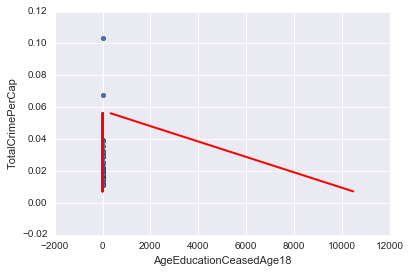

In [73]:
# Plot observed data
df.plot(kind='scatter', x='AgeEducationCeasedAge18', y='TotalCrimePerCap')

# Plot regression line
plt.plot(X_minmax, predictions, c='red', linewidth=2)
plt.savefig('LinearRegression2.png')

# The model includes population density which is per area and not per person so the regression line is difficult to read due to scale

In [31]:
# Take roughly a third of the rows as training data
df_train = df[:20]
df_train

,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,TotalCrime,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,...,GeneralHealthNotStated,Total_Under18Male,Total_Under18Female,Total_Under18,Green,Area,PopulationDensity,GreensPerKMSQ,GreensPerPerson,TotalCrimePerCap
0,Balbriggan,0.008028,0.006988,0.007445,0.019549,0.042010,0.488562,0.511438,24042,0.382289,...,0.021338,0.171949,0.161883,0.333832,9,60.000023,400.699846,0.150000,0.000374,0.022461
1,Ballyfermot,0.009863,0.006273,0.012655,0.029733,0.058523,0.480329,0.519671,27579,0.349070,...,0.020559,0.124225,0.119149,0.243374,4,8.568579,3218.620030,0.466822,0.000145,0.028790
2,Ballymun,0.008720,0.010012,0.011995,0.034694,0.065421,0.480185,0.519815,21675,0.316955,...,0.034556,0.138085,0.133472,0.271557,4,7.025158,3085.339783,0.569382,0.000185,0.030727
3,BlackrockCoDublin,0.007599,0.003315,0.004878,0.011070,0.026862,0.469166,0.530834,31978,0.432391,...,0.015980,0.111420,0.108481,0.219901,3,8.965902,3566.624005,0.334601,0.000094,0.015792
4,Blanchardstown,0.008055,0.005536,0.005903,0.021248,0.040743,0.491364,0.508636,98078,0.432064,...,0.027509,0.155539,0.147862,0.303401,15,45.287530,2165.673399,0.331217,0.000153,0.019495
5,BridewellDublin,0.012134,0.007567,0.013003,0.200531,0.233235,0.516787,0.483213,22994,0.469688,...,0.037488,0.071149,0.067235,0.138384,0,3.005021,7651.860597,0.000000,0.000000,0.032704
6,Cabinteely,0.007022,0.002534,0.002259,0.009464,0.021280,0.482384,0.517616,32754,0.403829,...,0.020913,0.126916,0.121603,0.248519,35,18.411407,1779.005778,1.900995,0.001069,0.011815
7,Cabra,0.007871,0.005949,0.007185,0.027367,0.048373,0.473296,0.526704,21851,0.428493,...,0.035467,0.108279,0.106677,0.214956,3,11.359962,1923.509972,0.264085,0.000137,0.021006
8,Clontarf,0.011143,0.002658,0.003034,0.012593,0.029428,0.476573,0.523427,37243,0.449615,...,0.019467,0.106033,0.099294,0.205327,21,18.083254,2059.529726,1.161295,0.000564,0.016835
9,Coolock,0.007718,0.005343,0.011645,0.018214,0.042920,0.483481,0.516519,52213,0.385555,...,0.025722,0.133032,0.127210,0.260242,2,17.676889,2953.743672,0.113142,0.000038,0.024706


In [32]:
# Remaining rows will function as test data
df_test = df[20:]
df_test

,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,TotalCrime,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,...,GeneralHealthNotStated,Total_Under18Male,Total_Under18Female,Total_Under18,Green,Area,PopulationDensity,GreensPerKMSQ,GreensPerPerson,TotalCrimePerCap
20,Malahide,0.006240,0.003104,0.003324,0.011696,0.024363,0.491471,0.508529,31892,0.450834,...,0.020225,0.131381,0.120689,0.252069,4,22.252301,1433.200106,0.179757,0.000125,0.012668
21,Mountjoy,0.017627,0.010166,0.010733,0.035255,0.073782,0.518784,0.481216,22919,0.431389,...,0.070771,0.079759,0.070160,0.149919,4,4.049969,5659.055363,0.987662,0.000175,0.038527
22,Pearse Street,0.039357,0.034014,0.029888,0.189113,0.292372,0.512167,0.487833,18904,0.533168,...,0.118123,0.052581,0.051471,0.104052,3,3.182021,5940.879322,0.942797,0.000159,0.103259
23,Raheny,0.005603,0.003122,0.006283,0.015208,0.030216,0.475847,0.524153,24987,0.385841,...,0.015568,0.114299,0.113099,0.227398,4,13.654908,1829.891495,0.292935,0.000160,0.015008
24,Santry,0.009612,0.006529,0.004371,0.018467,0.038979,0.468335,0.531665,35686,0.396262,...,0.026117,0.099703,0.095836,0.195539,22,15.133922,2358.014011,1.453688,0.000616,0.020512
25,Shankill,0.007623,0.004406,0.007094,0.018551,0.037675,0.481581,0.518419,22694,0.404116,...,0.020358,0.141800,0.130828,0.272627,10,20.719053,1095.320316,0.482648,0.000441,0.019124
26,Skerries,0.004206,0.004469,0.002629,0.011655,0.022960,0.487863,0.512137,11411,0.381912,...,0.013583,0.151959,0.144510,0.296468,7,30.605302,372.843897,0.228719,0.000613,0.011305
27,Store Street,0.020865,0.019325,0.027634,0.108622,0.176446,0.503291,0.496709,21423,0.525697,...,0.071279,0.059329,0.067264,0.126593,1,6.848610,3128.079865,0.146015,0.000047,0.067824
28,Sundrive Road,0.013237,0.004954,0.007451,0.019618,0.045260,0.475309,0.524691,25232,0.387960,...,0.027148,0.108236,0.107007,0.215243,7,4.851760,5200.587305,1.442775,0.000277,0.025642
29,Swords,0.006307,0.004456,0.007243,0.016867,0.034874,0.494232,0.505768,49149,0.468779,...,0.028241,0.147144,0.138273,0.285418,26,105.245527,466.993718,0.247041,0.000529,0.018006


## Train on the training data frame

In [74]:
lm = sm.ols(formula="TotalCrimePerCap ~ GreensPerPerson + PrincipalStatusUnemployed + PopulationDensity + AgeEducationCeasedAge18 + HighestLevelEducationLowerSecondary + GeneralHealthBad + SocialClassUnskilled + PrincipalStatusLookingForFirstJob + PrincipalStatusStudent", data=df_train).fit()

# Print learned weights
print(lm.params)

Intercept                              0.014400
GreensPerPerson                        0.979223
PrincipalStatusUnemployed              0.139715
PopulationDensity                      0.000001
AgeEducationCeasedAge18               -0.155601
HighestLevelEducationLowerSecondary    0.034060
GeneralHealthBad                       1.103847
SocialClassUnskilled                  -0.303350
PrincipalStatusLookingForFirstJob      0.305950
PrincipalStatusStudent                -0.064150
dtype: float64


In [75]:
# Print metrics
# R-squared value for this model is 0.965 indicating high level of variability accounted for
# Intercept, PopulationDensity, AgeEducationCeasedAge18, GeneralHealthBad and SocialClassUnskilled all found to be significant with p-values less than 0.05.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       TotalCrimePerCap   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     30.33
Date:                Sat, 07 May 2016   Prob (F-statistic):           4.25e-06
Time:                        19:58:56   Log-Likelihood:                 101.21
No. Observations:                  20   AIC:                            -182.4
Df Residuals:                      10   BIC:                            -172.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
In

## Test on the training data frame

In [35]:
# Predict on the df_train
predictedtrain = lm.predict(df_train)
predictedtrain

array([ 0.02663547,  0.02932788,  0.02751007,  0.01995411,  0.03284261,
        0.03780768,  0.01337992,  0.02044105,  0.00573382,  0.02125169,
        0.0368361 ,  0.01287508,  0.027884  ,  0.04529527,  0.00516583,
        0.04297808,  0.04531522,  0.03670343,  0.02145436,  0.01647705])

In [76]:
# Compare actual and predicted values in array
[df_train.TotalCrimePerCap, predictedtrain]

[0     0.022461
 1     0.028790
 2     0.030727
 3     0.015792
 4     0.019495
 5     0.032704
 6     0.011815
 7     0.021006
 8     0.016835
 9     0.024706
 10    0.016656
 11    0.019886
 12    0.029650
 13    0.039166
 14    0.014331
 15    0.016688
 16    0.032058
 17    0.035973
 18    0.015416
 19    0.011433
 Name: TotalCrimePerCap, dtype: float64,
 array([ 0.02663547,  0.02932788,  0.02751007,  0.01995411,  0.03284261,
         0.03780768,  0.01337992,  0.02044105,  0.00573382,  0.02125169,
         0.0368361 ,  0.01287508,  0.027884  ,  0.04529527,  0.00516583,
         0.04297808,  0.04531522,  0.03670343,  0.02145436,  0.01647705])]

In [77]:
# Pair the actual and predicted values which are shown above
print("Actual value - Predicted value:\n", (df_train.TotalCrimePerCap - lm.predict(df_train)))
print("\n(Actual value - Predicted value)^2:\n", (df_train.TotalCrimePerCap - lm.predict(df_train))**2)

Actual value - Predicted value:
 0     0.001853
1    -0.001901
2    -0.000693
3     0.001988
4    -0.001011
5     0.000014
6    -0.001040
7    -0.000249
8     0.001647
9     0.000105
10   -0.001083
11    0.000667
12    0.004163
13   -0.000524
14   -0.001660
15   -0.000291
16    0.000842
17   -0.000360
18    0.000316
19   -0.002782
Name: TotalCrimePerCap, dtype: float64

(Actual value - Predicted value)^2:
 0     3.432447e-06
1     3.614790e-06
2     4.802564e-07
3     3.953786e-06
4     1.023047e-06
5     1.922075e-10
6     1.082023e-06
7     6.179258e-08
8     2.712416e-06
9     1.107036e-08
10    1.173257e-06
11    4.450966e-07
12    1.733021e-05
13    2.750666e-07
14    2.756923e-06
15    8.493518e-08
16    7.091308e-07
17    1.294739e-07
18    1.001650e-07
19    7.739612e-06
Name: TotalCrimePerCap, dtype: float64


In [37]:
# Get the Mean Squared Error of the model used on the training set
meansqerr = ((df_train.TotalCrimePerCap - lm.predict(df_train))**2).mean()
print("\nThe Mean Squared Error is:\n", meansqerr)


The Mean Squared Error is:
 9.48968296633e-05


In [86]:
# Print the absolute error of the model on the training set, then calculate the mean below
print("Absolute Error\n\n|Actual values - Predicted values|:\n", abs(df_train.TotalCrimePerCap - lm.predict(df_train)))

Absolute Error

|Actual values - Predicted values|:
 0     0.001853
1     0.001901
2     0.000693
3     0.001988
4     0.001011
5     0.000014
6     0.001040
7     0.000249
8     0.001647
9     0.000105
10    0.001083
11    0.000667
12    0.004163
13    0.000524
14    0.001660
15    0.000291
16    0.000842
17    0.000360
18    0.000316
19    0.002782
Name: TotalCrimePerCap, dtype: float64


In [87]:
# Print the Mean Absolute Error of the model on the training set
meanabserr = abs(df_train.TotalCrimePerCap - lm.predict(df_train)).mean()
print("\nMean Absolute Error:\n", meanabserr)


Mean Absolute Error:
 0.00115958204444


### Now, test the model on the test data frame
### Then get errors for test data frame
### Squared Differences between actual and predicted values and Root Mean Squared Error

In [88]:
[df_test.TotalCrimePerCap, lm.predict(df_test)]

[20    0.012668
 21    0.038527
 22    0.103259
 23    0.015008
 24    0.020512
 25    0.019124
 26    0.011305
 27    0.067824
 28    0.025642
 29    0.018006
 Name: TotalCrimePerCap, dtype: float64,
 array([ 0.01130435,  0.02842428,  0.02114899,  0.02261475,  0.02356047,
         0.01748832,  0.01477733,  0.01932442,  0.03307304,  0.01254852])]

In [95]:
# Print the Mean Squared Error of the model on the test set
meansqtest = ((df_test.TotalCrimePerCap - lm.predict(df_test))** 2).mean()
print("\nMean Squared Error:\n", meansqerr)

# Print the Mean Absolute Error of the model on the test set
# Mean Absolute Error on the test set is higher than on the training set, as expected
meanabstest = abs(df_test.TotalCrimePerCap - lm.predict(df_test)).mean()
print("\nMean Absolute Error:\n", meanabserr)


Mean Squared Error:
 0.000936504567776

Mean Absolute Error:
 0.0170727832042


In [40]:
# Squared Differences between actual values and predicted values on the original data frame
squared_differences = (df.TotalCrimePerCap - lm.predict(df))** 2
print("\n(Actual-Predicted)^2:\n", squared_differences)

# Mean Squared Error of the squared differences onthe original data frame
mse = squared_differences.mean()
print("\nMean Squared Error:\n", mse)

# Root Mean Squared Error of the squared differences on the original data frame
rmse= mse ** 0.5
print("\nRoot Mean Squared Error:\n", rmse)


(Actual-Predicted)^2:
 0     1.742878e-05
1     2.892927e-07
2     1.034637e-05
3     1.732230e-05
4     1.781670e-04
5     2.604566e-05
6     2.447872e-06
7     3.190575e-07
8     1.232445e-04
9     1.193565e-05
10    4.072278e-04
11    4.915595e-05
12    3.120126e-06
13    3.756821e-05
14    8.399587e-05
15    6.911420e-04
16    1.757448e-04
17    5.339331e-07
18    3.646146e-05
19    2.543986e-05
20    5.166653e-07
21    1.313731e-05
22    2.298441e-03
23    1.019094e-04
24    2.288968e-05
25    4.461587e-05
26    4.277796e-05
27    2.727134e-04
28    8.294833e-06
29    7.290913e-06
Name: TotalCrimePerCap, dtype: float64

Mean Squared Error:
 0.000157017461585

Root Mean Squared Error:
 0.0125306608598


## Project Conclusions

- There is an observable relationship between the presence of green space in an area, the level of population density and the level of crime in an area. 
- A much bigger data set would be needed to get a more accurate picture of this relationship.
- Having the area of green space as opposed to a count could potentially add further accuracy to the models.
<br><br>
- Addressing small areas within Dublin is difficult due to varied administrative divisions and borders. The city is governed by different bodies at various levels, i.e. crime by An Garda Síochána and the various parks and playing pitches by the four county councils and Dublin City Council.
<br><br>
- Normalising the data to account for different population sizes in different areas allowed us to get a clearer picture of the true effect of these statistics on the areas in question.
<br><br>
- We used data from An Garda Síochána from 2011 to better correspond to the Census data used, which was from the last available Census (2011).
<br><br>
- The root mean squared error (0.0125306608598) shows the error that exists between actual and predicted values. The percentage error between actual values and the error is 47%.
<br><br>
- In this notebook we show that using simple linear regression, higher levels of green space will result in lower levels of crime and higher population density will result in higher crime levels. This is particularly relevant for our target area of Liberties/Dublin 8 (Garda subdivisions Kilmainham and Kevin Street) which has a high population density and higher than average crime rate and much lower than average green space.